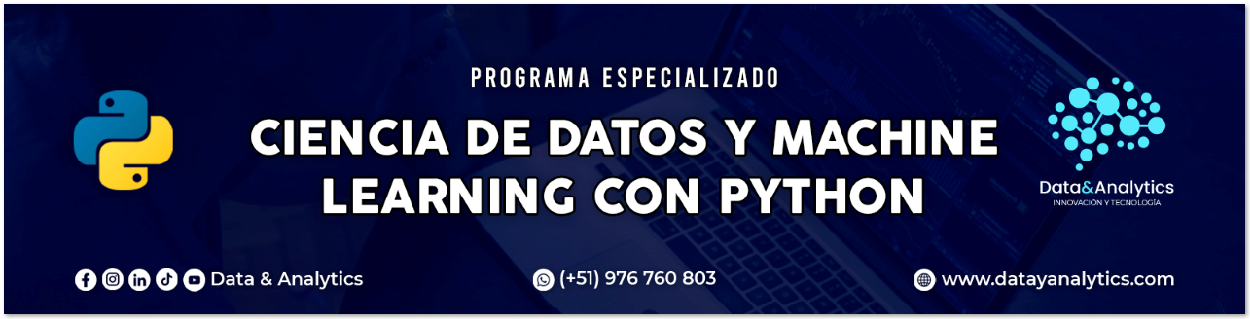

#DATA & ANALYTICS



----------------------------
SESIÓN N°: Aplicación de un modelo de Regresión usando TensorFlow

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

# **Imputación de datos usando Random Fotest**



## Conjunto de datos a trabajar: **Brewer's Friend Beer Recipes**

Este es un conjunto de datos de 75,000 cervezas caseras con más de 176 estilos diferentes. Los registros de cerveza son informados por los usuarios y se clasifican de acuerdo con uno de los 176 estilos diferentes. Estas recetas tienen tanto o tan poco detalle como las proporcionó el usuario, pero hay al menos 5 columnas útiles donde se ingresaron datos para cada una: Original Gravity, Final Gravity, ABV, IBU, and Color

https://www.kaggle.com/jtrofe/beer-recipes

In [1]:
# Cargando librerías necesarias
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador

In [2]:
# Cargamos nuestro set de datos a trabajar
df = pd.read_csv('recipeData.csv',encoding='latin-1')
print(df.shape)
df.head(5)

FileNotFoundError: ignored

In [ ]:
# Entendiendo nuestro set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         10782 non-null  int64  
 1   Name           10782 non-null  object 
 2   URL            10782 non-null  object 
 3   Style          10661 non-null  object 
 4   StyleID        10782 non-null  int64  
 5   Size(L)        10782 non-null  float64
 6   OG             10782 non-null  float64
 7   FG             10782 non-null  float64
 8   ABV            10782 non-null  float64
 9   IBU            10782 non-null  float64
 10  Color          10781 non-null  float64
 11  BoilSize       10781 non-null  float64
 12  BoilTime       10781 non-null  float64
 13  BoilGravity    8462 non-null   float64
 14  Efficiency     10781 non-null  float64
 15  MashThickness  4609 non-null   float64
 16  SugarScale     10781 non-null  object 
 17  BrewMethod     10781 non-null  object 
 18  PitchR

In [ ]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
df.describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10781.000000,10781.000000,10781.000000,8462.000000,10781.000000,4609.000000,4964.000000,6891.000000,4984.000000
mean,5391.500000,66.132072,37.249216,1.431687,1.086977,6.375974,45.898657,14.418840,42.293451,66.164456,1.411713,66.973015,2.011210,0.782474,19.116227,22741.451846
std,3112.639635,57.445145,167.584583,2.348041,0.499558,2.246198,55.873705,12.519902,183.052668,16.530613,2.138389,14.071565,1.530438,0.395314,4.073662,18626.009695
min,1.000000,1.000000,1.890000,1.000000,0.425441,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,87.000000
25%,2696.250000,10.000000,18.930000,1.052000,1.012000,5.140000,22.220000,5.520000,18.930000,60.000000,1.041000,65.000000,1.330000,0.500000,18.000000,5854.000000
50%,5391.500000,50.000000,20.820000,1.060000,1.014000,5.890000,35.290000,9.350000,26.500000,60.000000,1.049000,70.000000,1.500000,0.750000,20.000000,18868.000000
75%,8086.750000,115.000000,22.710000,1.072000,1.018000,7.110000,57.817500,18.850000,29.000000,70.000000,1.064000,75.000000,2.700000,1.000000,20.000000,35104.000000
max,10782.000000,176.000000,6000.000000,34.034500,10.341400,53.810000,2673.830000,186.000000,7000.000000,240.000000,38.300000,100.000000,63.000000,2.000000,80.000000,126334.000000


In [ ]:
# explorando la cantidad de valores perdidos en las variables
df.isna().sum()

BeerID              0
Name                0
URL                 0
Style             121
StyleID             0
Size(L)             0
OG                  0
FG                  0
ABV                 0
IBU                 0
Color               1
BoilSize            1
BoilTime            1
BoilGravity      2320
Efficiency          1
MashThickness    6173
SugarScale          1
BrewMethod          1
PitchRate        5818
PrimaryTemp      3891
PrimingMethod    9049
PrimingAmount    9469
UserId           5798
dtype: int64

**Matrix missing:** Mostramos una matriz de calor para visualizar las variables con mayor presencia de valores perdidos. Las líneas blancas indican los valores faltantes en cada columna.

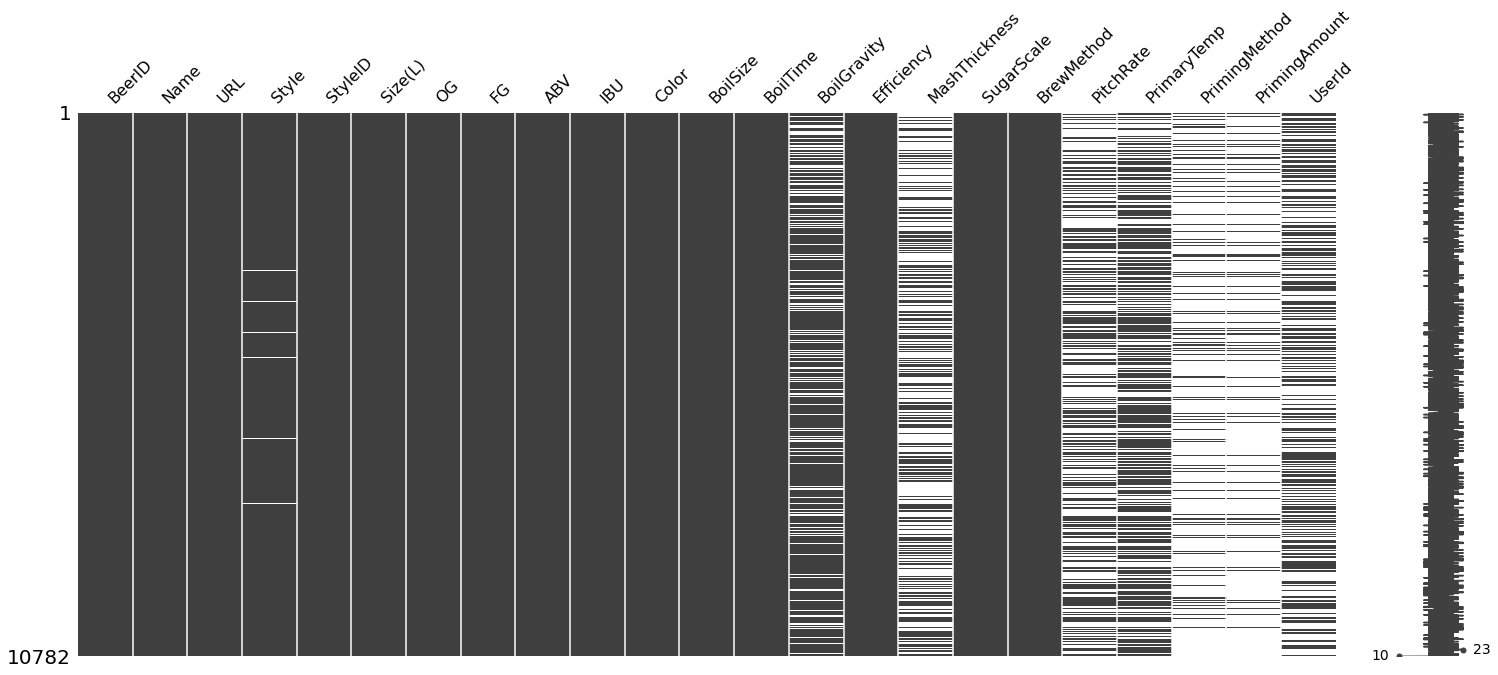

In [ ]:
# matrix missing
msno.matrix(df)

**heatmap missing cor:** El mapa de calor muestra una correlación positiva con el azul. Cuanto más oscuro sea el tono de azul, mayor será la correlación.


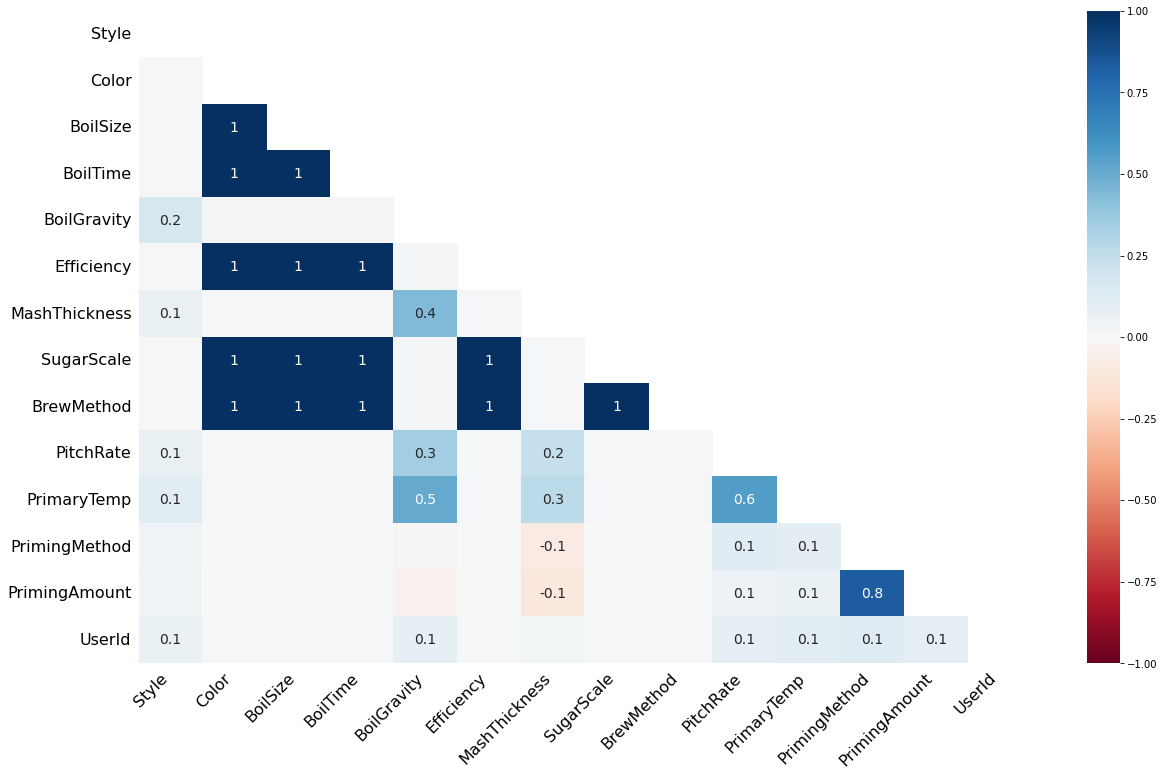

In [ ]:
# heatmap missing
msno.heatmap(df)

**bar missing:** Otra forma de visualizar los datos de los valores perdidos es mediante el uso de gráficos de barras. Estas barras muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos. Junto con eso, también se muestra el número de valores que faltan.

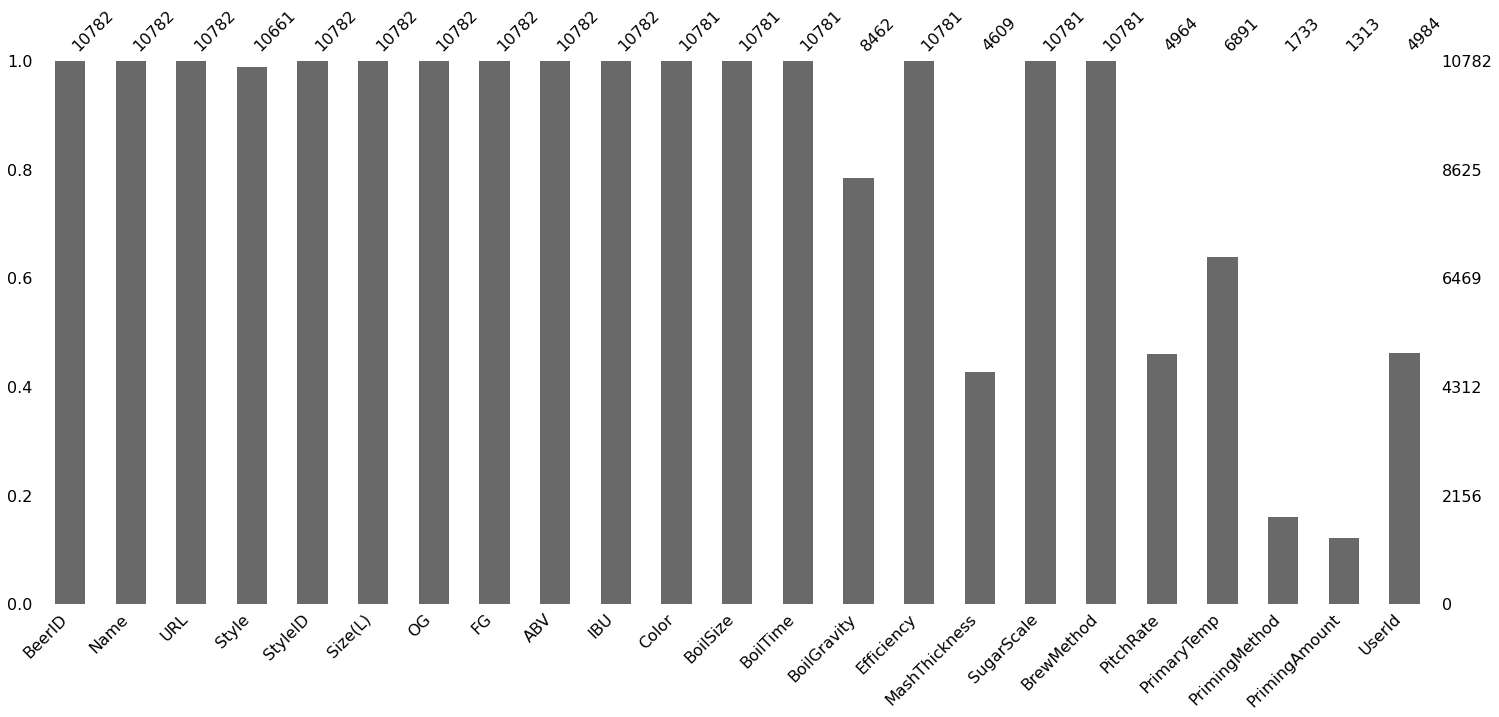

In [ ]:
# bar missing
msno.bar(df)

### **Técnicas de Imputación con Modelos de Machine Learning**

Podemos corregir los valores faltantes aplicando el aprendizaje automático a nuestro conjunto de datos. Podemos considerar una columna con datos faltantes como nuestra variable de destino, y columnas existentes con datos completos como nuestras variables predictoras, entonces podemos construir un modelo de aprendizaje automático utilizando registros completos como nuestros conjuntos de datos de entrenamiento y prueba y los registros con datos incompletos como nuestra generalización

**MissForest:**

Es otra técnica que se utiliza para completar los valores faltantes utilizando Random Forest de forma iterada. La columna candidata se selecciona del conjunto de todas las columnas que tienen el menor número de valores perdidos .

En el primer paso, todas las demás columnas, es decir, las columnas no candidatas que tienen valores perdidos, se rellenan con la media de las columnas numéricas y el modo de las columnas categóricas y, a continuación, el imputador ajusta un modelo de bosque aleatorio con las columnas candidatas como variable de resultado ( variable de destino) y las columnas restantes como variables independientes y luego llenando los valores faltantes en la columna candidata utilizando las predicciones del modelo de bosque aleatorio ajustado.

Luego, el imputador avanza y se selecciona la siguiente columna candidata con el segundo menor número de valores perdidos y el proceso se repite para cada columna con los valores perdidos.

In [ ]:
! pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 2.7 MB/s eta 0:00:00


In [ ]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [ ]:
imp_forest = MissForest(max_iter=2)

In [ ]:
df_imput06 = df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']]
df_imput06 = imp_forest.fit_transform(df_imput06)

df_imput06 = pd.DataFrame(df_imput06, columns=['BoilGravity_05','MashThickness_05','PitchRate_05','PrimaryTemp_05'])
print(df_imput06.shape)
df_imput06.head()

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 1
(10782, 4)


,BoilGravity_05,MashThickness_05,PitchRate_05,PrimaryTemp_05
0,1.038000,1.461433,0.441475,17.780000
1,1.070000,1.740900,0.639967,19.800128
2,1.372918,1.594500,0.976000,21.787500
3,1.372918,1.594500,0.976000,21.787500
4,1.050000,3.162500,0.744054,19.000000


para validar que las distribuciones se mantienen.

In [ ]:
pd.merge(df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']],df_imput06,left_index=True, right_index=True).describe()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,BoilGravity_05,MashThickness_05,PitchRate_05,PrimaryTemp_05
count,8462.000000,4609.000000,4964.000000,6891.000000,10782.000000,10782.000000,10782.000000,10782.000000
mean,1.411713,2.011210,0.782474,19.116227,1.398234,1.932869,0.804005,19.613716
std,2.138389,1.530438,0.395314,4.073662,1.900601,1.141363,0.309796,3.518869
min,0.000000,0.000000,0.000000,-17.780000,0.000000,0.000000,0.000000,-17.780000
25%,1.041000,1.330000,0.500000,18.000000,1.043000,1.500000,0.562057,18.330000
50%,1.049000,1.500000,0.750000,20.000000,1.055000,1.594500,0.750000,20.000000
75%,1.064000,2.700000,1.000000,20.000000,1.112000,2.238500,0.976000,21.787500
max,38.300000,63.000000,2.000000,80.000000,38.300000,63.000000,2.000000,80.000000


Para mayor detaller revisar: (https://https://pypi.org/project/missingpy/)